### Naive bayes

Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications. The benefits of Naive Bayes are that the model is simple to build and useful on large data sets. Further, the model makes an explicit assumption that the features are independent given the class label. What does this mean? Well first let's consider the concept of independence. Independence is a concept from probability theory and it implies that if we have two random variables $X$ and $Y$, then

$$
P(X \cap Y) = P(X)P(Y)
$$

This is where the qualifier "Naive" in "Naive Bayes" comes from. The assumption is Naive because it often does not hold. The assumption of independence implies that the model assumes that the is zero correlation among the features. Hence, the joint probability distribution $P(X, Y)$ can be obtained from the marginal probability distributions $P(X)$ and $P(Y)$ simply by multiplication. Now let's consider Bayes theorem. Bayes theorem is an important result in Statistics and it allows us to obtain a posterior distribution given a prior distribution and a likelihood. Now that is a mouth full but do not worry we will walk you through it. First, let's recall from the previous train how we denoted class labels. Remember that we said the classes are labeled $K = 1, \cdots, k$? So, given this the independence assumption conditional on the class label is denoted

$$
P(X_{1} \cap X_{2} \mid K = k) = P(X_{1} \mid K = k)P(X_{2} \mid K = k)
$$

In the expression above $X_{1}$ and $X_{2}$ denoted random predictor variables.Keep this in the back of your mind. Bayes theorem states that

$$
P(K = k \mid X) = \frac{P(X \mid K= k) P(K = k)}{P(X)}
$$

In the expression above $P(K = k \mid X)$ is called the posterior probability distribution. $P(X \mid K= k)$ is the likelihood and $P(K = k)$ is the prior. The posterior tell us what the probability is of the class being $k$ given a particular observation. The prior is basically a measure of how likely we think it is for any observation to be assigned to a particular class before we have observed any observations. The likelihood gives us a measure of what the data says about the probability that the observation belongs to class $k$. Lets generalise the expression above to include all our random predictor variables

$$
X_{1}, \cdots, X_{p}
$$

In this case

$$
P(K = k \mid X_{1} \cap X_{2} \cdots \cap X_{p}) = \frac{P(X_{1} \cap X_{2} \cdots \cap X_{p} \mid K= k) P(K = k)}{P(X)}
$$

Now remember the assumption in the back of your head. This allows us to simplify the expression above to become

$$
P(K = k \mid X_{1} \cap X_{2} \cdots \cap X_{p}) = \frac{P(X_{1}\mid K= k) P(X_{2}\mid K= k) \cdots P(X_{p}\mid K= k) P(K = k)}{P(X)}
$$

A special mathematical symbol allows us to represent the product $P(X_{1}\mid K= k) P(X_{2}\mid K= k) \cdots P(X_{p}\mid K= k)$ as $\prod_{i = 1}^{p} P(X_{i}\mid K= k)$. Hence, the expression above becomes


$$
P(K = k \mid X_{1} \cap X_{2} \cdots \cap X_{p}) = \frac{\prod_{i = 1}^{p} P(X_{i}\mid K= k)P(K = k)}{P(X)}
$$

Now lets consider how the Bayes classifier assigns observations to a particular class. One method, called maximum a posteriori (MAP), it to assign the observation to the class the maximises $P(K = k \mid X_{1} \cap X_{2} \cdots \cap X_{p})$ for $K = 1, \cdots, k$. Let's consider what this means for $K = 2$. In this case we calculate

$$
P(K = 1 \mid X_{1} \cap X_{2} \cdots \cap X_{p}) \\
P(K = 2 \mid X_{1} \cap X_{2} \cdots \cap X_{p}) \\
$$

If $P(K = 1 \mid X_{1} \cap X_{2} \cdots \cap X_{p}) > P(K = 2 \mid X_{1} \cap X_{2} \cdots \cap X_{p})$ then we say that the observation $\underline{X}$ is assigned to class $1$ else it is assigned to class $2$. This concept can be generalised to more classes. We just want to make something clear here. An observation, something that actually happened, and is denoted

$$
\underline{x}_{i} = (x_{i,1}, x_{i,2}, \cdots, x_{i,p})
$$

A random variables, something that captures all possible things that can happen, is denoted

$$
\underline{X} = (X_{1}, X_{2}, \cdots, X_{p})
$$

Using this notation, $X_{i}, i = 1 \cdots, p$ denotes a feature. Let's get to some code. Note that we will use the same data set that was used in train 1.

### A word on Scikit learn

Scikit learn provides 3 implementation of the Naive Bayes method.

    a) Gaussian: It is used in classification and it assumes that features follow a normal distribution.

    b) Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

    c) Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

Source: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/


### Getting started

We will consider the Gaussian Naive Bayes model. You are encouraged to try the other models out. First we import the libraries that we will need


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss

import warnings
warnings.filterwarnings("ignore")

In [2]:
X, y = load_breast_cancer(return_X_y=True)

### Fit the model and obtain a measure of log loss

In [3]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# define the model 
naive_bayes = GaussianNB()
# fit the model 
naive_bayes.fit(X_train, y_train)
# get predictions on the test set 
y_hat = naive_bayes.predict_proba(X_test)
# calculate the loss 
print("The log loss error for our model is: ", log_loss(y_test, y_hat))

The log loss error for our model is:  0.48986013211


### Plot the decision boundary 

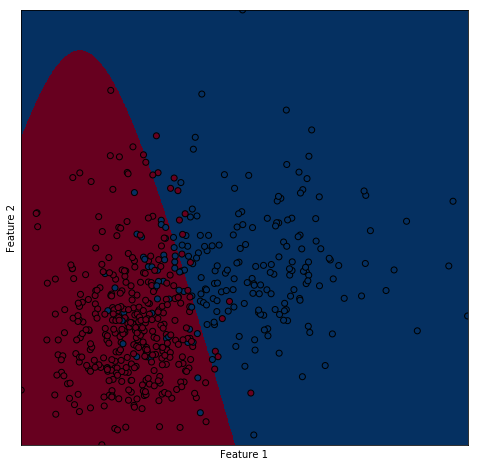

In [4]:
i = 0; j = 1
naive_bayes.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
 
x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = naive_bayes.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

### K - nearest neighbours 

K-nearest neighbors(KNN) is a simple Machine Learning algorithm that can be used for both classification and regression. To illustrate the concept of KNN we plot a sample of training data in two dimensional space as shown below. Please note, in this example we have two possible classes- green and red

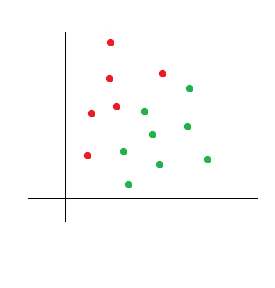

There is no explicit training phase in KNN. Our model simply memorizes these points. KNN is a lazy learner, that is, it does not use training data to do any generalization. Given any data point in a feature space we classify that point by taking into account the class of $k$ nearest data points. For example, if we want to classify blue point as shown in following figure- we consider $k$ nearest data points and we assign a class by majority role.

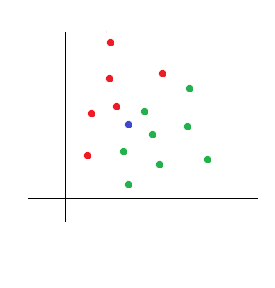

Let us take $k = 3$ as shown below.

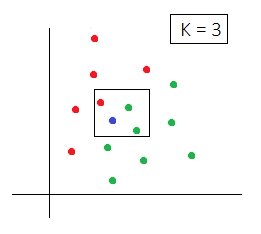

As we can see, there are two data points with green class and one data point with red class. Hence, we assign green class to new point(blue). Just to make it concrete let us take an another example. Let us change the position of new point(blue point) as shown below.

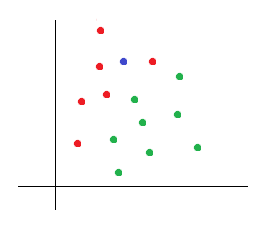

If we take $k = 5$ then we get four neighbors with red class and one neighbor with green class. Hence, new point will be classified as red point.

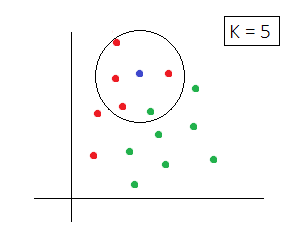

Source: https://github.com/savan77/Practical-Machine-Learning-With-Python/blob/master/Part%20-%203/Practical%20Machine%20Learning%20With%20Python%20-%20Part%203.ipynb

### Fit the model and obtain a measure of log loss

The log loss error for our model is:  0.0950711654508


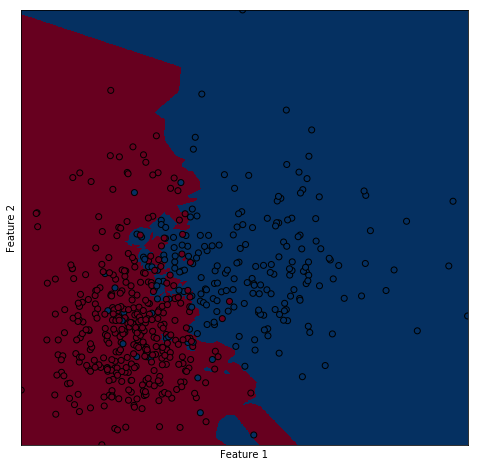

In [5]:
n_neighbors = 3# change me to play around with how many nearest neighbours I look for.

knn = KNeighborsClassifier(n_neighbors)
# fit the model 
knn.fit(X_train, y_train)
# get predictions on the test set 
y_hat = knn.predict_proba(X_test)
# calculate the loss 
print("The log loss error for our model is: ", log_loss(y_test, y_hat))

i = 0; j = 1
knn.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
 
x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = knn.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()